### Zusammenfassung der normalisierten Pupillengröße pro Kategorie


label,count,mean,std,median,min,max
kategorie,16,0.00,1.00,0.04,-1.38,2.37
textimg_person,1390,0.00,0.98,-0.04,-2.88,3.61
textimg_person_politik_ncc,1788,0.00,0.99,-0.11,-2.76,5.11
textimg_politik_ncc,2357,0.00,0.99,0.00,-2.77,3.63
politik_ncc,2189,0.00,0.98,0.11,-4.80,2.79
textimg_ncc,1605,0.00,0.98,-0.11,-2.94,4.59
textimg_ort,3003,0.00,0.98,-0.03,-3.69,4.31
meme_ncc,12689,0.00,0.98,0.01,-4.14,4.08
textimg_politik,10157,0.00,0.99,-0.05,-5.01,5.24
person,69124,0.00,0.98,-0.01,-5.07,5.53


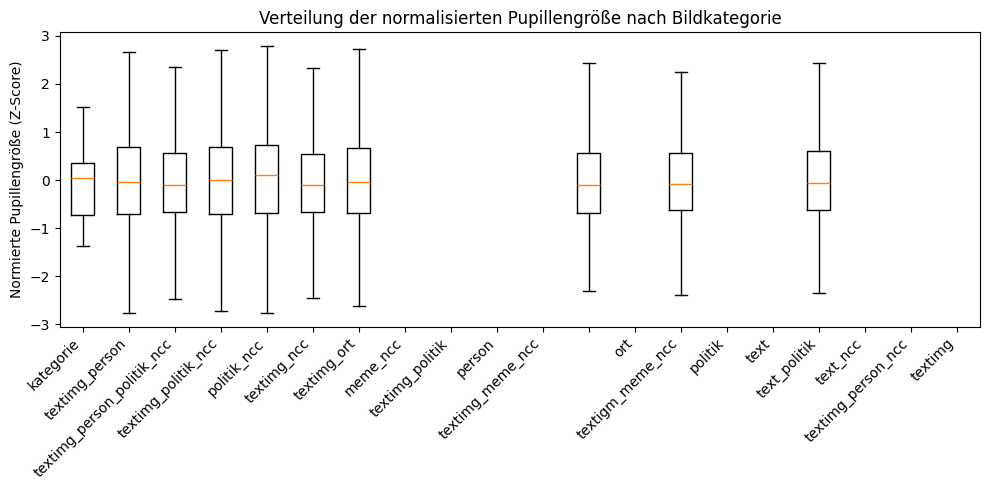

In [3]:
# Exploration der normalisierten Pupillengröße nach Bildkategorie

import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.errors import EmptyDataError
from IPython.display import display, HTML

# 1) Fixations mit normalisierter Pupillengröße laden
fix_folder = "processed/fixations"
records = []

for path in glob.glob(os.path.join(fix_folder, "*_fixations.csv")):
    base = os.path.basename(path).replace("_fixations.csv", "")
    parts = base.split("_")
    subject = parts[0]
    label = "_".join(parts[2:])  # z.B. "meme", "ort", "textimg"
    try:
        df = pd.read_csv(path)
    except EmptyDataError:
        continue
    if df.empty or 'pupil_size_norm' not in df.columns:
        continue
    df = df.copy()
    df['subject'] = subject
    df['label']   = label
    records.append(df)

if not records:
    print("⚠️ Keine Fixationsdateien mit 'pupil_size_norm' gefunden.")
else:
    all_fix = pd.concat(records, ignore_index=True)

    # 2) Zusammenfassung pro Kategorie
    summary = all_fix.groupby('label')['pupil_size_norm'].agg(
        count='count',
        mean = 'mean',
        std  = 'std',
        median='median',
        min  = 'min',
        max  = 'max'
    ).reset_index().sort_values('mean', ascending=False)

    print("### Zusammenfassung der normalisierten Pupillengröße pro Kategorie")
    display(HTML(summary.to_html(index=False, float_format="{:.2f}".format)))

    # 3) Boxplot pro Kategorie
    labels = summary['label'].tolist()
    data   = [all_fix.loc[all_fix['label']==lab, 'pupil_size_norm'].values
              for lab in labels]

    plt.figure(figsize=(10,5))
    plt.boxplot(data, labels=labels, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Normierte Pupillengröße (Z‑Score)')
    plt.title('Verteilung der normalisierten Pupillengröße nach Bildkategorie')
    plt.tight_layout()
    plt.show()
